# 回帰
連続値を予測する

## 資料の流れ
### 1. データの可視化
データを可視化し、相関がありそうなデータを探す
### 2. 学習
相関がありそうなデータを用いて学習を行う。

In [40]:
## ライブラリのインポート
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. データの可視化
## pandasで可視化する
DataFrameオブジェクトに変換するのがよい

In [5]:
# データのインポート
from sklearn.datasets import load_boston
boston_data = load_boston() # ボストンの家の価格のデータ・セット
print(boston_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
df_X = pd.DataFrame(data = boston_data.data, columns= boston_data.feature_names)
df_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [13]:
df_y = pd.DataFrame(data = boston_data.target, columns= ["MEDV"])
df_y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [8]:
# 統計情報
df_X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


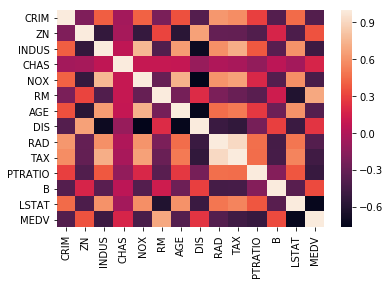

In [14]:
# 全変数の相関情報をヒートマップで可視化
df_all = pd.concat([df_X, df_y ], axis=1)  # axis:1は横方向結合

sns.heatmap(df_all.corr())


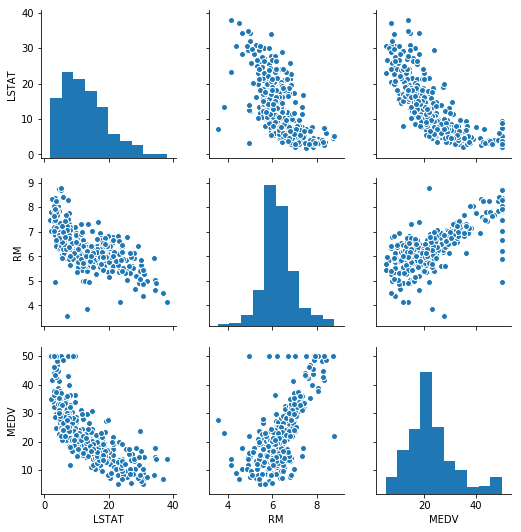

In [22]:
sns.pairplot(df_all.loc[:,['LSTAT','RM',"MEDV"]])

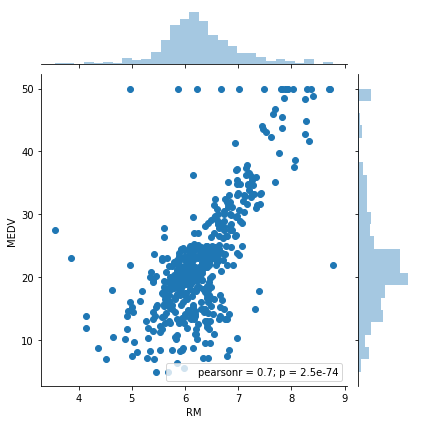

In [15]:
sns.jointplot(x="RM", y="MEDV", data=df_all.loc[:,['RM',"MEDV"]])

# 2. 学習

# 線形回帰

学習データ455: テストデータ:51


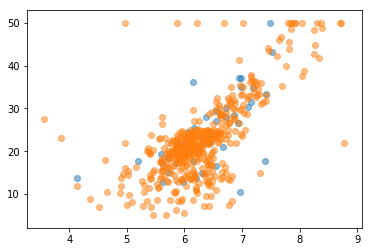

In [37]:
data_RM = df_all.loc[:,["RM","MEDV"]]

## 訓練データ作成
X = data_RM.RM.values.reshape(len(data_RM.RM), 1)
y = data_RM.MEDV

from sklearn.model_selection import train_test_split

# 学習データとテストデータを分離
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

print(f"学習データ{len(X_train)}: テストデータ:{len(X_test)}")

plt.scatter(X_test, y_test, alpha=0.5)
plt.scatter(X_train, y_train, alpha=0.5)

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

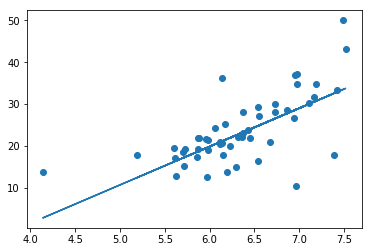

In [38]:
# 訓練モデル作成
model.fit(X_train, y_train)

# 予測出力
plt.scatter(X_test,y_test)
plt.plot(X_test, model.predict(X_test))

## 重回帰